In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df['loan_grade'] = (
    df['loan_grade']
    .astype(str)
    .str.strip()
    .str.upper()
    .map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})
)
df['cb_person_default_on_file']=(df['cb_person_default_on_file'].astype(str).str.strip().str.upper().map({'N':0,'Y':1}))
df['loan_intent']=df['loan_intent'].map({'PERSONAL':1,'EDUCATION':2,'MEDICAL':3,'VENTURE':4,'HOMEIMPROVEMENT':5,'DEBTCONSOLIDATION':6})


In [10]:
x=df[['loan_amnt','loan_grade','person_income','cb_person_default_on_file','loan_percent_income','person_age','loan_intent']]
y=df['loan_status']

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15,metric='minkowski')
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

Accuracy: 0.8615927574037133


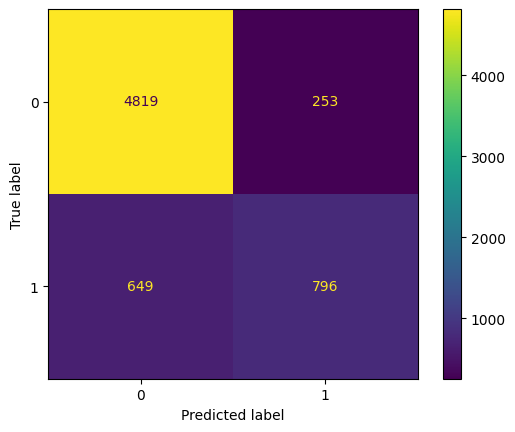

In [12]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()